In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import *
%matplotlib inline


In [2]:
path = os.getcwd() + '/fullGames.csv'
data = pd.read_csv(path)
data.head()

,HomeTeam,AwayTeam,HomeGoals,AwayGoals,HomeXG,AwayXG,HomeShots,AwayShots,HomeCorners,AwayCorners,HomeSubs,AwaySubs,HomeYC,AwayYC,HomeRC,AwayRC
0,Borussia Dortmund,Hamburg SV,3.0,1.0,1.8354,0.4050,13.0,4.0,7.0,7.0,3.0,3.0,1.0,3.0,0.0,0.0
1,FC Augsburg,SC Freiburg,2.0,2.0,1.6848,0.5423,10.0,6.0,5.0,4.0,3.0,2.0,2.0,4.0,0.0,0.0
2,Werder Bremen,Kaiserslautern,2.0,0.0,2.5788,1.0306,10.0,6.0,6.0,5.0,2.0,3.0,1.0,2.0,0.0,0.0
3,Paris Saint-Germain,Lorient,0.0,1.0,0.5509,0.8049,9.0,7.0,7.0,6.0,3.0,3.0,1.0,3.0,0.0,0.0
4,Caen,Valenciennes,1.0,0.0,0.7052,1.5982,9.0,9.0,3.0,11.0,2.0,2.0,2.0,1.0,0.0,0.0


Want to make new columns for the result the home team got and the result the away team got. 

0 = loss,
1 = tie,
2 = win

In [3]:
data['HomeResult'] = 0
data['AwayResult'] = 0

In [4]:
data.head()

,HomeTeam,AwayTeam,HomeGoals,AwayGoals,HomeXG,AwayXG,HomeShots,AwayShots,HomeCorners,AwayCorners,HomeSubs,AwaySubs,HomeYC,AwayYC,HomeRC,AwayRC,HomeResult,AwayResult
0,Borussia Dortmund,Hamburg SV,3.0,1.0,1.8354,0.4050,13.0,4.0,7.0,7.0,3.0,3.0,1.0,3.0,0.0,0.0,0,0
1,FC Augsburg,SC Freiburg,2.0,2.0,1.6848,0.5423,10.0,6.0,5.0,4.0,3.0,2.0,2.0,4.0,0.0,0.0,0,0
2,Werder Bremen,Kaiserslautern,2.0,0.0,2.5788,1.0306,10.0,6.0,6.0,5.0,2.0,3.0,1.0,2.0,0.0,0.0,0,0
3,Paris Saint-Germain,Lorient,0.0,1.0,0.5509,0.8049,9.0,7.0,7.0,6.0,3.0,3.0,1.0,3.0,0.0,0.0,0,0
4,Caen,Valenciennes,1.0,0.0,0.7052,1.5982,9.0,9.0,3.0,11.0,2.0,2.0,2.0,1.0,0.0,0.0,0,0


In [5]:
for i in range(data.shape[0]):
    # Away Team Win
    if(data['HomeGoals'][i] < data['AwayGoals'][i]):
        data['AwayResult'][i] = 2
    # Tie
    if(data['HomeGoals'][i] == data['AwayGoals'][i]):
        data['HomeResult'][i] = 1
        data['AwayResult'][i] = 1
    # Home Team Win
    if(data['HomeGoals'][i] > data['AwayGoals'][i]):
        data['HomeResult'][i] = 2

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

In [6]:
data.head()

,HomeTeam,AwayTeam,HomeGoals,AwayGoals,HomeXG,AwayXG,HomeShots,AwayShots,HomeCorners,AwayCorners,HomeSubs,AwaySubs,HomeYC,AwayYC,HomeRC,AwayRC,HomeResult,AwayResult
0,Borussia Dortmund,Hamburg SV,3.0,1.0,1.8354,0.4050,13.0,4.0,7.0,7.0,3.0,3.0,1.0,3.0,0.0,0.0,2,0
1,FC Augsburg,SC Freiburg,2.0,2.0,1.6848,0.5423,10.0,6.0,5.0,4.0,3.0,2.0,2.0,4.0,0.0,0.0,1,1
2,Werder Bremen,Kaiserslautern,2.0,0.0,2.5788,1.0306,10.0,6.0,6.0,5.0,2.0,3.0,1.0,2.0,0.0,0.0,2,0
3,Paris Saint-Germain,Lorient,0.0,1.0,0.5509,0.8049,9.0,7.0,7.0,6.0,3.0,3.0,1.0,3.0,0.0,0.0,0,2
4,Caen,Valenciennes,1.0,0.0,0.7052,1.5982,9.0,9.0,3.0,11.0,2.0,2.0,2.0,1.0,0.0,0.0,2,0


In [7]:
data['HomeResult'].describe()

count    9074.000000
mean        1.177761
std         0.845256
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: HomeResult, dtype: float64

Just made results a field. Going to save that to a csv file because took a little bit of time to run. Then re-read in the data

In [8]:
#data.to_csv(r'C:\Users\Joe Yando\Desktop\CS-254\finalProject\fullGamesWithResults.csv',index=False, header = True)

In [9]:
path = os.getcwd() + '/fullGamesWithResults.csv' #1827 games to test on
#first game to test on 6312
data = pd.read_csv(path,nrows = 8116)

In [10]:
data

,HomeTeam,AwayTeam,HomeGoals,AwayGoals,HomeXG,AwayXG,HomeShots,AwayShots,HomeCorners,AwayCorners,HomeSubs,AwaySubs,HomeYC,AwayYC,HomeRC,AwayRC,HomeResult,AwayResult
0,Borussia Dortmund,Hamburg SV,3.0,1.0,1.8354,0.4050,13.0,4.0,7.0,7.0,3.0,3.0,1.0,3.0,0.0,0.0,2,0
1,FC Augsburg,SC Freiburg,2.0,2.0,1.6848,0.5423,10.0,6.0,5.0,4.0,3.0,2.0,2.0,4.0,0.0,0.0,1,1
2,Werder Bremen,Kaiserslautern,2.0,0.0,2.5788,1.0306,10.0,6.0,6.0,5.0,2.0,3.0,1.0,2.0,0.0,0.0,2,0
3,Paris Saint-Germain,Lorient,0.0,1.0,0.5509,0.8049,9.0,7.0,7.0,6.0,3.0,3.0,1.0,3.0,0.0,0.0,0,2
4,Caen,Valenciennes,1.0,0.0,0.7052,1.5982,9.0,9.0,3.0,11.0,2.0,2.0,2.0,1.0,0.0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8111,AS Nancy Lorraine,Lyon,0.0,3.0,0.7355,1.1688,8.0,8.0,4.0,4.0,3.0,3.0,4.0,2.0,0.0,0.0,0,2
8112,Nice,Stade Rennes,1.0,0.0,0.4784,1.4983,5.0,14.0,4.0,8.0,3.0,3.0,0.0,1.0,0.0,0.0,2,0
8113,Arsenal,Liverpool,3.0,4.0,1.4669,1.1577,8.0,10.0,5.0,4.0,3.0,3.0,3.0,3.0,0.0,0.0,0,2
8114,Marseille,Toulouse,0.0,0.0,0.7157,0.6828,8.0,6.0,9.0,6.0,3.0,3.0,3.0,1.0,0.0,0.0,1,1


Going to create two multiple linear regression models to predict home goals and away goals.

In [11]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [12]:
# Going to break into two datasets, one for home goal stuff, and one for away goal stuff

home = data[[ 'HomeTeam','HomeXG', 'HomeShots', 'HomeCorners', 'HomeSubs', 'HomeYC', 'HomeRC', 'HomeGoals']]
away = data[[ 'AwayTeam','AwayXG', 'AwayShots', 'AwayCorners', 'AwaySubs', 'AwayYC', 'AwayRC', 'AwayGoals']]

Now Going to create some pretty narly models my dood

In [13]:
# Split into training and testing sets

#trainHome, valHome = train_test_split(home, test_size=0.78)
#trainAway, valAway = train_test_split(away, test_size=0.78)

trainHome = home.iloc[0:6312]
valHome = home.iloc[6312:8116]

trainAway = away.iloc[0:6312]
valAway = away.iloc[6312:8116]

In [14]:
cols = home.shape[1]
trainHomeX = trainHome.iloc[:,1:cols-1] # iloc slicing function 
trainHomeY = trainHome.iloc[:,cols-1:cols]

trainAwayX = trainAway.iloc[:,1:cols-1] # iloc slicing function 
trainAwayY = trainAway.iloc[:,cols-1:cols]

In [15]:
modelHome = linear_model.Ridge(alpha = 0.1)
modelAway = linear_model.Ridge(alpha = 0.1)

modelHome.fit(trainHomeX, trainHomeY)

modelAway.fit(trainAwayX, trainAwayY)

Ridge(alpha=0.1)

In [16]:
#print('Home score Coefficients: \n', modelHome.coef_, modelHome.intercept_)
#print('Away score Coefficients: \n', modelAway.coef_, modelAway.intercept_)
print(modelHome.get_params())

{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': 'deprecated', 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}


In [17]:
print('Home Coeffiecient of Determination: ', modelHome.score(trainHomeX, trainHomeY))
print('Away Coeffiecient of Determination: ', modelAway.score(trainAwayX, trainAwayY))

Home Coeffiecient of Determination:  0.29005761262397944
Away Coeffiecient of Determination:  0.2781139630000108


Let's see how we did with the validation part of the model

In [41]:
cols = home.shape[1]
valHomeX = valHome.iloc[:,1:cols-1] # iloc slicing function 
valHomeY = valHome.iloc[:,cols-1:cols]

valAwayX = valAway.iloc[:,1:cols-1] # iloc slicing function 
valAwayY = valAway.iloc[:,cols-1:cols]

(1804, 6)


In [19]:
valHomeY.shape

(1804, 1)

In [20]:
print('Home score R-squared: ', modelHome.score(valHomeX, valHomeY))
print('Away score R-squared: ', modelAway.score(valAwayX, valAwayY))

Home score R-squared:  0.29595084954255746
Away score R-squared:  0.2667550848453899


Now get what the predicted scores are and save them in a place

In [21]:
# Need to conver them into a matrix to do predict function
valHomeXMatrix = np.array(valHomeX.values)
valAwayXMatrix = np.matrix(valAwayX.values)

In [22]:
predHome = modelHome.predict(valHomeXMatrix)
predAway = modelAway.predict(valAwayXMatrix)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  "X does not have valid feature names, but"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  "X does not have valid feature names, but"
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [23]:
predHomedf = dfTeams = pd.DataFrame(predHome, columns = ['PredHomeGoals'])
predAwaydf = dfTeams = pd.DataFrame(predAway, columns = ['PredAwayGoals'])

The next thing will be combining the inputs, goals, and predicted goals all back into one data frame.

In [24]:
# Reset all of the indexes
valHomeX = valHomeX.reset_index(drop = True)
valHomeY = valHomeY.reset_index(drop = True)

valAwayX = valAwayX.reset_index(drop = True) 
valAwayY = valAwayY.reset_index(drop = True)

In [25]:
dfFullHome = pd.concat([valHomeX, valHomeY, predHomedf], axis = 1, join = 'inner')
dfFullAway = pd.concat([valAwayX, valAwayY, predAwaydf], axis = 1, join = 'inner')

dfBoth = pd.concat([dfFullHome, dfFullAway], axis = 1, join = 'inner')

In [26]:
dfBoth

,HomeXG,HomeShots,HomeCorners,HomeSubs,HomeYC,HomeRC,HomeGoals,PredHomeGoals,AwayXG,AwayShots,AwayCorners,AwaySubs,AwayYC,AwayRC,AwayGoals,PredAwayGoals
0,0.4324,6.0,3.0,3.0,3.0,0.0,0.0,0.738731,0.6046,4.0,2.0,3.0,4.0,0.0,1.0,0.836315
1,1.0083,9.0,6.0,3.0,3.0,0.0,0.0,1.069080,0.6437,5.0,3.0,3.0,3.0,0.0,1.0,0.805345
2,1.0550,8.0,8.0,3.0,1.0,0.0,2.0,1.109233,0.7610,8.0,2.0,3.0,2.0,0.0,2.0,1.001614
3,1.2917,10.0,5.0,3.0,3.0,0.0,0.0,1.428064,1.8776,14.0,9.0,2.0,2.0,0.0,2.0,1.526866
4,1.6979,14.0,7.0,4.0,2.0,2.0,4.0,1.554563,3.6992,19.0,12.0,4.0,6.0,0.0,4.0,3.341952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1799,0.7355,8.0,4.0,3.0,4.0,0.0,0.0,0.883276,1.1688,8.0,4.0,3.0,2.0,0.0,3.0,1.273002
1800,0.4784,5.0,4.0,3.0,0.0,0.0,1.0,0.929608,1.4983,14.0,8.0,3.0,1.0,0.0,0.0,1.308976
1801,1.4669,8.0,5.0,3.0,3.0,0.0,3.0,1.612778,1.1577,10.0,4.0,3.0,3.0,0.0,4.0,1.253016
1802,0.7157,8.0,9.0,3.0,3.0,0.0,0.0,0.543872,0.6828,6.0,6.0,3.0,1.0,0.0,0.0,0.629786


Now calculate and find out how well model did

In [27]:
# Round the predicted goals columns
dfBoth['PredHomeGoalsRound'] = dfBoth['PredHomeGoals'].round(0)
dfBoth['PredAwayGoalsRound'] = dfBoth['PredAwayGoals'].round(0)

In [28]:
dfBoth.head()

,HomeXG,HomeShots,HomeCorners,HomeSubs,HomeYC,HomeRC,HomeGoals,PredHomeGoals,AwayXG,AwayShots,AwayCorners,AwaySubs,AwayYC,AwayRC,AwayGoals,PredAwayGoals,PredHomeGoalsRound,PredAwayGoalsRound
0,0.4324,6.0,3.0,3.0,3.0,0.0,0.0,0.738731,0.6046,4.0,2.0,3.0,4.0,0.0,1.0,0.836315,1.0,1.0
1,1.0083,9.0,6.0,3.0,3.0,0.0,0.0,1.069080,0.6437,5.0,3.0,3.0,3.0,0.0,1.0,0.805345,1.0,1.0
2,1.0550,8.0,8.0,3.0,1.0,0.0,2.0,1.109233,0.7610,8.0,2.0,3.0,2.0,0.0,2.0,1.001614,1.0,1.0
3,1.2917,10.0,5.0,3.0,3.0,0.0,0.0,1.428064,1.8776,14.0,9.0,2.0,2.0,0.0,2.0,1.526866,1.0,2.0
4,1.6979,14.0,7.0,4.0,2.0,2.0,4.0,1.554563,3.6992,19.0,12.0,4.0,6.0,0.0,4.0,3.341952,2.0,3.0


In [29]:
corHomeGoals = 0
corAwayGoals = 0
corResultsRounded = 0
corResultsRaw = 0
equalRaw = 0
equalRounded = 0
totalDraws = 0

for i in range(dfBoth.shape[0]):
    # Check if goals were predicted correctly
    if(dfBoth['HomeGoals'][i] == dfBoth['PredHomeGoalsRound'][i]):
        corHomeGoals += 1
    if(dfBoth['AwayGoals'][i] == dfBoth['PredAwayGoalsRound'][i]):
        corAwayGoals += 1
        
    # Check if got a correct result
    if((dfBoth['HomeGoals'][i] == dfBoth['AwayGoals'][i]) & (dfBoth['PredHomeGoalsRound'][i] == dfBoth['PredAwayGoalsRound'][i])):
        corResultsRounded += 1
        equalRounded += 1
    if((dfBoth['HomeGoals'][i] < dfBoth['AwayGoals'][i]) & (dfBoth['PredHomeGoalsRound'][i] < dfBoth['PredAwayGoalsRound'][i])):
        corResultsRounded += 1
    if((dfBoth['HomeGoals'][i] > dfBoth['AwayGoals'][i]) & (dfBoth['PredHomeGoalsRound'][i] > dfBoth['PredAwayGoalsRound'][i])):
        corResultsRounded += 1
        
    # Check results with raw predicted goal values 
    if((dfBoth['HomeGoals'][i] == dfBoth['AwayGoals'][i]) & (dfBoth['PredHomeGoals'][i] == dfBoth['PredAwayGoals'][i])):
        corResultsRaw += 1
        equalRaw +=1
    if((dfBoth['HomeGoals'][i] < dfBoth['AwayGoals'][i]) & (dfBoth['PredHomeGoals'][i] < dfBoth['PredAwayGoals'][i])):
        corResultsRaw += 1
    if((dfBoth['HomeGoals'][i] > dfBoth['AwayGoals'][i]) & (dfBoth['PredHomeGoals'][i] > dfBoth['PredAwayGoals'][i])):
        corResultsRaw += 1
    
    # Get total Draws
    if(dfBoth['HomeGoals'][i] == dfBoth['AwayGoals'][i]):
        totalDraws += 1
        
    

In [30]:
print(corHomeGoals)
print(corAwayGoals)
print(corResultsRounded)
print(corResultsRaw)

601
713
872
980


In [31]:
print("Results: ")
print("Home Goal Proportion: " , corHomeGoals / dfBoth.shape[0])
print("Away Goal Proportion: " , corAwayGoals / dfBoth.shape[0])
print("Overall Goal Proportion: " , (corHomeGoals + corAwayGoals) / (2 * dfBoth.shape[0]))
print("Rounded Goal Result Proportion: " , corResultsRounded / dfBoth.shape[0])
print("Raw Goal Result Proportion: " , corResultsRaw / dfBoth.shape[0])

# Results: 
# Home Goal Proportion:  0.4440771349862259
# Away Goal Proportion:  0.49077134986225895
# Overall Goal Proportion:  0.4674242424242424
# Rounded Goal Result Proportion:  0.45179063360881544
# Raw Goal Result Proportion:  0.44641873278236915

Results: 
Home Goal Proportion:  0.33314855875831484
Away Goal Proportion:  0.39523281596452325
Overall Goal Proportion:  0.3641906873614191
Rounded Goal Result Proportion:  0.48337028824833705
Raw Goal Result Proportion:  0.5432372505543237


So Overall Results aren't the best. One thing that is noteworthy is that the raw data didn't correctly pick draws because the raw goal numbers have like 10 decimals, but it only predicted 39 less games correctly than the rounded goals did. Since about 1/3 games end in draws, not predicting those correctly is a big loss. So a way we can potentially fix this is creating some kind of like buffer that if the raw predicted goals are close enough then we should predict the game will be a draw

In [32]:
print(equalRounded)
print(equalRaw)
print(totalDraws)

# 1573
# 0
# 2640

204
0
470


In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
def GeneratePolynomialFeatures(X, polydegree):  
    # poly = # create sklearn PolynomialFeatures Object with degree=polydegree
    poly = PolynomialFeatures(polydegree)
    # polynomial_x = # This is the new generated features.
    polynomial_x = poly.fit_transform(X) 
    return polynomial_x

def plot_SimpleNonlinearRegression_line(theta, X, poly):

    """
    Plotting regression line for nonlinear regression
    theta: current weights (coefficients) for regression
    x: independent variable
    poly: the sklearn polynomialfeatures object being used to perform regression
    """
    
    # find min and max values
    min_x = np.min(X)
    max_x = np.max(X)
    # get range of data to transform and make predictions on
    min_max_range = np.linspace(min_x, max_x, 100)
    polynomial_min_max_range = poly.fit_transform(min_max_range)
    y_vals = np.dot(polynomial_min_max_range, theta)
    plt.plot(min_max_range, y_vals)


theta = modelHome.coef_
X = np.matrix(trainHomeX.values)
#poly = GeneratePolynomialFeatures(X, 6)
poly = PolynomialFeatures(6)
print(type(poly))
plot_SimpleNonlinearRegression_line(theta, X, poly)


<class 'sklearn.preprocessing._polynomial.PolynomialFeatures'>


ValueError: Expected 2D array, got 1D array instead:
array=[ 0.          0.31313131  0.62626263  0.93939394  1.25252525  1.56565657
  1.87878788  2.19191919  2.50505051  2.81818182  3.13131313  3.44444444
  3.75757576  4.07070707  4.38383838  4.6969697   5.01010101  5.32323232
  5.63636364  5.94949495  6.26262626  6.57575758  6.88888889  7.2020202
  7.51515152  7.82828283  8.14141414  8.45454545  8.76767677  9.08080808
  9.39393939  9.70707071 10.02020202 10.33333333 10.64646465 10.95959596
 11.27272727 11.58585859 11.8989899  12.21212121 12.52525253 12.83838384
 13.15151515 13.46464646 13.77777778 14.09090909 14.4040404  14.71717172
 15.03030303 15.34343434 15.65656566 15.96969697 16.28282828 16.5959596
 16.90909091 17.22222222 17.53535354 17.84848485 18.16161616 18.47474747
 18.78787879 19.1010101  19.41414141 19.72727273 20.04040404 20.35353535
 20.66666667 20.97979798 21.29292929 21.60606061 21.91919192 22.23232323
 22.54545455 22.85858586 23.17171717 23.48484848 23.7979798  24.11111111
 24.42424242 24.73737374 25.05050505 25.36363636 25.67676768 25.98989899
 26.3030303  26.61616162 26.92929293 27.24242424 27.55555556 27.86868687
 28.18181818 28.49494949 28.80808081 29.12121212 29.43434343 29.74747475
 30.06060606 30.37373737 30.68686869 31.        ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

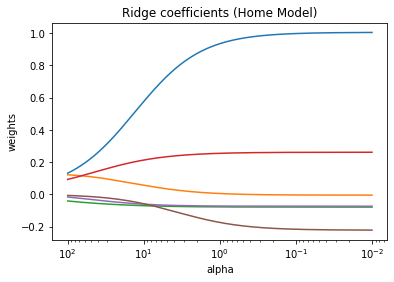

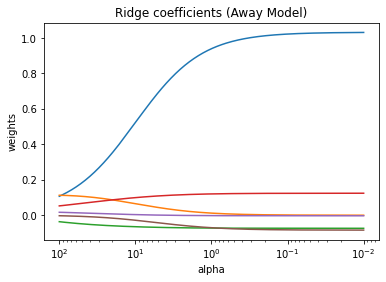

In [40]:
n_alphas = 200
alphas = np.logspace(-2, 2, n_alphas)

coefs = []
for a in alphas:
    #print(a*100)
    ridge = linear_model.Ridge(alpha=a*100, fit_intercept=False)
    ridge.fit(trainHomeX, trainHomeY)
    #print(ridge.coef_)
    #print(ridge.coef_.reshape(-1))

    coefs.append(ridge.coef_.reshape(-1))
    #exit()

# #############################################################################
# Display results
ax = plt.gca()
#coefs = np.array(coefs)
#coefs = coefs.reshape(-1)
ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients (Home Model)")
plt.axis("tight")
plt.show()



n_alphas = 200
alphas = np.logspace(-2, 2, n_alphas)

coefs = []
for a in alphas:
    #print(a*100)
    ridge = linear_model.Ridge(alpha=a*100, fit_intercept=False)
    ridge.fit(trainAwayX, trainAwayY)
    #print(ridge.coef_)
    #print(ridge.coef_.reshape(-1))

    coefs.append(ridge.coef_.reshape(-1))
    #exit()

# #############################################################################
# Display results
ax = plt.gca()
#coefs = np.array(coefs)
#coefs = coefs.reshape(-1)
ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients (Away Model)")
plt.axis("tight")
plt.show()